# 💠MULTIPLE LINEAR REGRESSION💠

In [3]:
import numpy as np                                                #Importing essential libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

## 💠Exploratory Data Analysis (EDA) 

In [4]:
data=pd.read_csv('ToyotaCorolla - MLR.csv')                     #Loading the dataset
print('Shape of data ',data.shape)
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'ToyotaCorolla - MLR.csv'

In [ ]:
data.info()                                           #Checking data types of all the columns 

In [ ]:
data.isnull().sum()                                        #Check for NULL values

In [5]:
print('Number of duplicate records -',data.duplicated().sum())      #Checking and removing duplicate records 
data=data.drop_duplicates()
print('Number of duplicate records -',data.duplicated().sum())

NameError: name 'data' is not defined

In [42]:
FT=data['Fuel_Type'].value_counts()                               #The majority vehicles are using petrol Fuel_Type
FT

Petrol    1264
Diesel     154
CNG         17
Name: Fuel_Type, dtype: int64

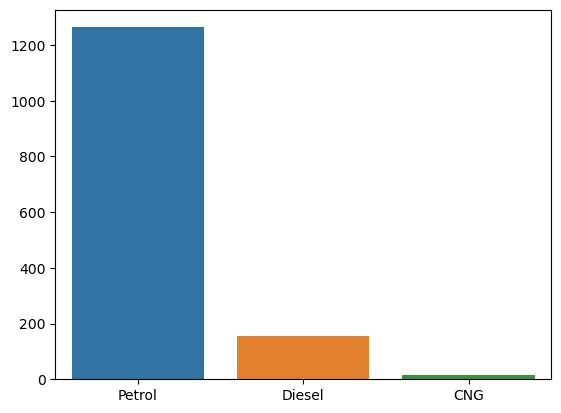

In [43]:
sns.barplot(x=FT.index,y=FT.values)
plt.show()

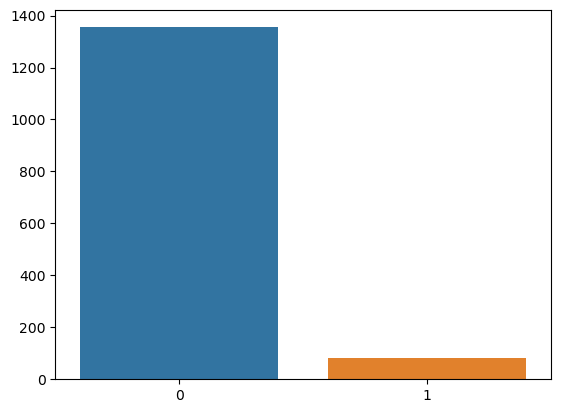

In [44]:
sns.barplot(x=data['Automatic'].value_counts().index,y=data['Automatic'].value_counts().values)
plt.show()                                                         #This showes majority vehicles are Manual

In [45]:
data.groupby('Automatic')['Price'].mean()      #There is not a such difference in average price of Manual and Automatic vehicle

Automatic
0    10691.176384
1    11224.625000
Name: Price, dtype: float64

In [7]:
Num_columns=[x for x in data.columns if ((data[x].dtype=='int64') or (data[x].dtype==float))]  #Seperating numeric columns 
Num_columns

['Price',
 'Age_08_04',
 'KM',
 'HP',
 'Automatic',
 'cc',
 'Doors',
 'Cylinders',
 'Gears',
 'Weight']

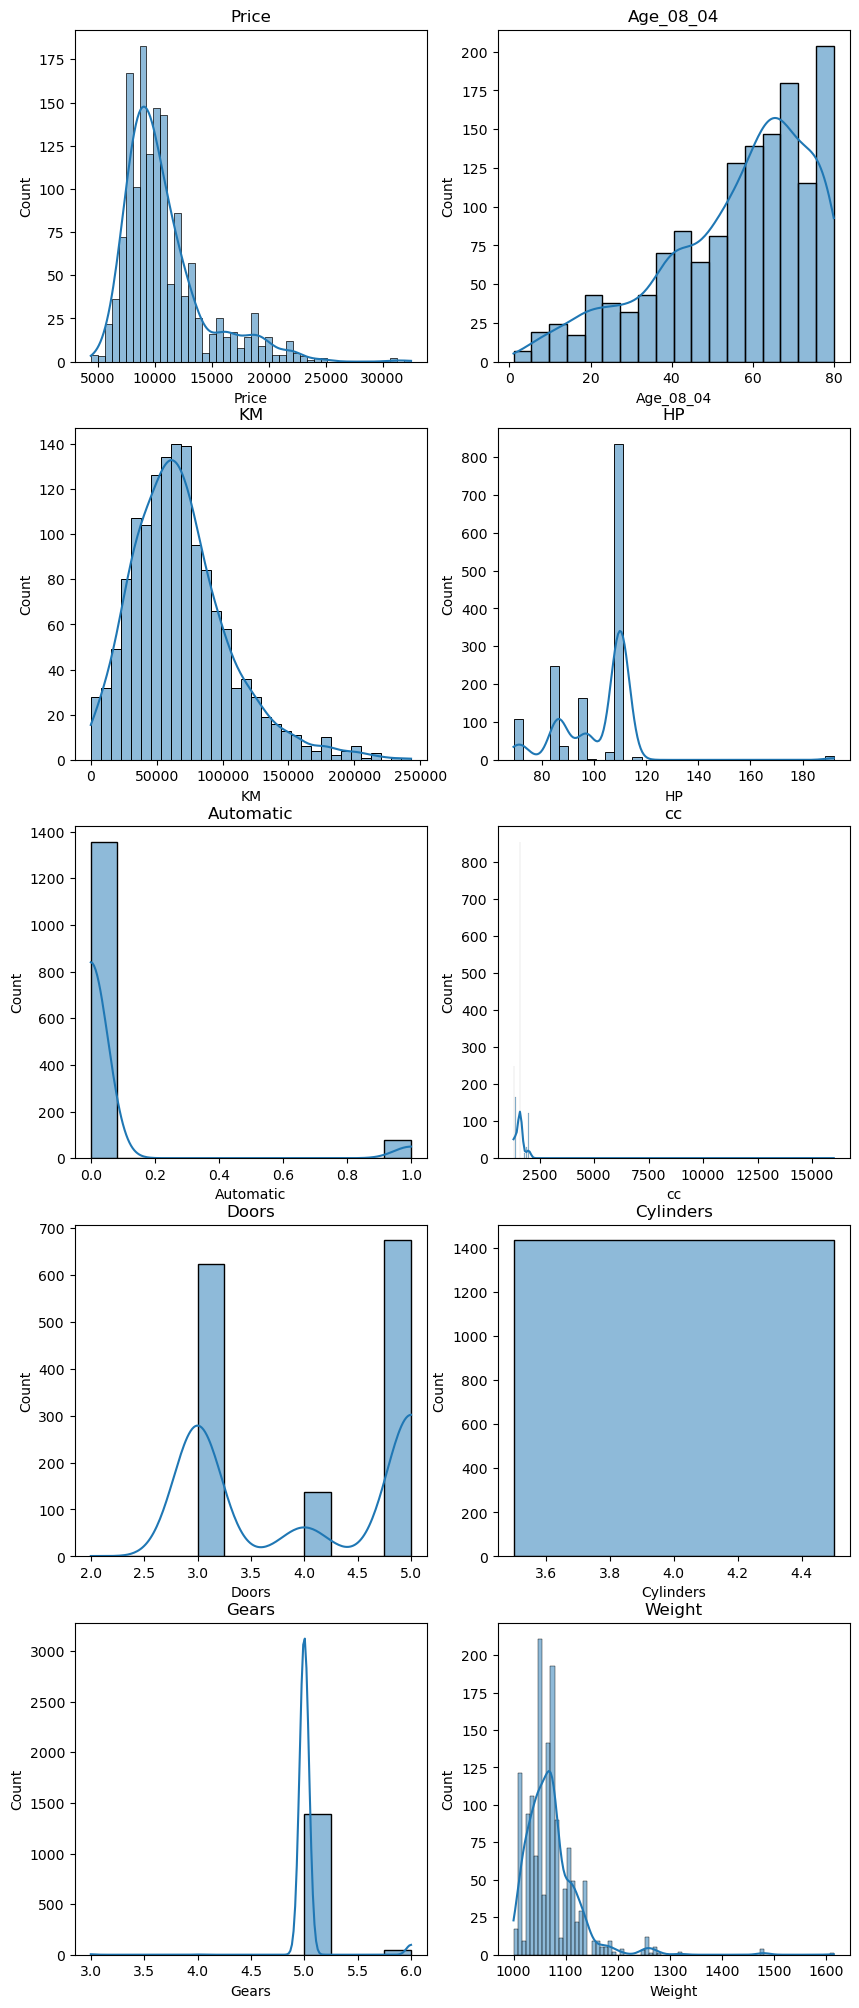

In [8]:
plt.figure(figsize=(10,25))                       #The graphs shows skewness which indicates presence of outliers in the dataset
                                                  #Cylinders feature is a redundant feature
for x,y in enumerate(Num_columns):
    plt.subplot(5,2,x+1)
    sns.histplot(data[y],kde=True)
    plt.title(y)
plt.show()

## 💠Feature selection

In [9]:
df1=data[['Price',
 'Age_08_04',
 'KM',
 'HP',
 'Automatic',
 'cc',
 'Doors',
 'Gears',
 'Weight']]
df1.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,90,0,2000,3,5,1165
1,13750,23,72937,90,0,2000,3,5,1165
2,13950,24,41711,90,0,2000,3,5,1165
3,14950,26,48000,90,0,2000,3,5,1165
4,13750,30,38500,90,0,2000,3,5,1170


In [10]:
from sklearn.preprocessing import OneHotEncoder 

Encoder=OneHotEncoder(sparse_output=False,drop='first')
d=pd.DataFrame(data['Fuel_Type'])
df=Encoder.fit_transform(d)
df2=pd.DataFrame(df)
df2.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [11]:
DF=pd.concat([df1,df2],axis=1)                      
DF.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,0,1
0,13500.0,23.0,46986.0,90.0,0.0,2000.0,3.0,5.0,1165.0,1.0,0.0
1,13750.0,23.0,72937.0,90.0,0.0,2000.0,3.0,5.0,1165.0,1.0,0.0
2,13950.0,24.0,41711.0,90.0,0.0,2000.0,3.0,5.0,1165.0,1.0,0.0
3,14950.0,26.0,48000.0,90.0,0.0,2000.0,3.0,5.0,1165.0,1.0,0.0
4,13750.0,30.0,38500.0,90.0,0.0,2000.0,3.0,5.0,1170.0,1.0,0.0


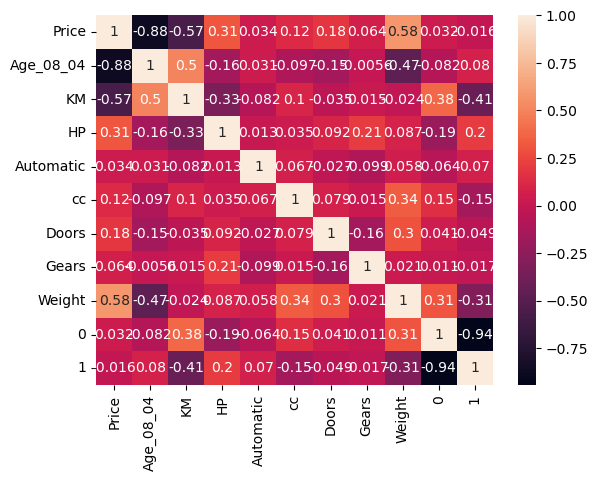

In [12]:
sns.heatmap(DF.corr(),annot=True)
plt.show()

In [13]:
DF=DF[['Age_08_04','KM','HP','Weight','Price']]             #Selected features for Ml Models using Heatmapping and correlations 
DF.head()

,Age_08_04,KM,HP,Weight,Price
0,23.0,46986.0,90.0,1165.0,13500.0
1,23.0,72937.0,90.0,1165.0,13750.0
2,24.0,41711.0,90.0,1165.0,13950.0
3,26.0,48000.0,90.0,1165.0,14950.0
4,30.0,38500.0,90.0,1170.0,13750.0


## 💠Outlier detection and treatment

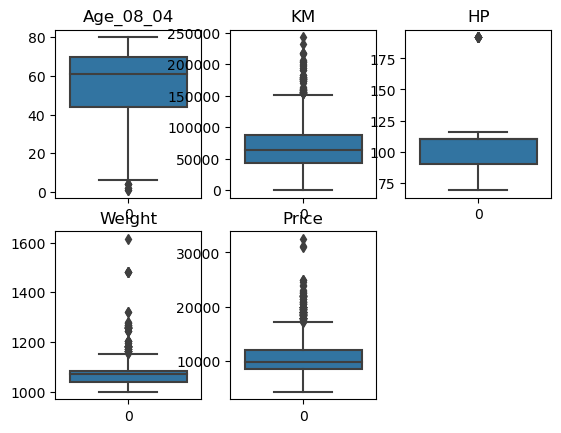

In [14]:
for x,y in enumerate(DF.columns):
    plt.subplot(2,3,x+1)
    sns.boxplot(DF[y])
    plt.title(y)
plt.show()

In [15]:
Q1=DF.quantile(0.25)
Q3=DF.quantile(0.75)
IQR=Q3-Q1

DF = DF[~((DF < (Q1 - 1.5 * IQR)) | (DF > (Q3 + 1.5 * IQR))).any(axis=1)]

In [16]:
DF.isnull().sum()

Age_08_04    1
KM           1
HP           1
Weight       1
Price        1
dtype: int64

In [17]:
DF=DF.dropna()
DF.isnull().sum()

Age_08_04    0
KM           0
HP           0
Weight       0
Price        0
dtype: int64

In [18]:
DF=DF.reset_index()
DF.head()

,index,Age_08_04,KM,HP,Weight,Price
0,9,23.0,71138.0,69.0,1105.0,12950.0
1,18,24.0,25563.0,110.0,1065.0,16750.0
2,19,30.0,64359.0,110.0,1105.0,16950.0
3,20,30.0,67660.0,110.0,1105.0,15950.0
4,22,28.0,56349.0,110.0,1120.0,15950.0


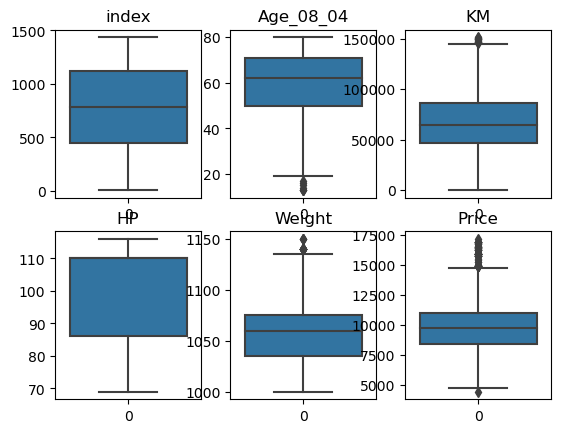

In [19]:
for x,y in enumerate(DF.columns):                      # Here we can observe majority of outliers from features are removed
    plt.subplot(2,3,x+1)
    sns.boxplot(DF[y])
    plt.title(y)
plt.show()

## 💠Data preprocessing and train test split

In [20]:
X=DF.drop('Price',axis=1)
Y=DF['Price']

In [21]:
scaler=MinMaxScaler()                                     #Normalizing the featuers using MinMaxScaler

Normalized_x=scaler.fit_transform(X)
Normalized_x=pd.DataFrame(Normalized_x,columns=X.columns).drop('index',axis=1)
Normalized_x.head()

,Age_08_04,KM,HP,Weight
0,0.149254,0.470175,0.00000,0.700000
1,0.164179,0.168950,0.87234,0.433333
2,0.253731,0.425370,0.87234,0.700000
3,0.253731,0.447187,0.87234,0.700000
4,0.223881,0.372428,0.87234,0.800000


In [22]:
X_train, X_test, y_train, y_test = train_test_split(Normalized_x, Y, test_size=0.2, random_state=42)

## 💠Model-1 : LinearRegression

In [23]:
LR_Model_1=LinearRegression()
LR_Model_1.fit(X_train,y_train)

y_pred=LR_Model_1.predict(X_test)


print('▶ r2_score for LR_Model_1 ',r2_score(y_test,y_pred))
print('▶ mean_squared_error for LR_Model_1 ',mean_squared_error(y_test,y_pred))
print('▶ root_mean_squared_error for LR_Model_1 ',np.sqrt(mean_squared_error(y_test,y_pred)))

▶ r2_score for LR_Model_1  0.8200864819388408
▶ mean_squared_error for LR_Model_1  920965.0804223916
▶ root_mean_squared_error for LR_Model_1  959.6692557451196


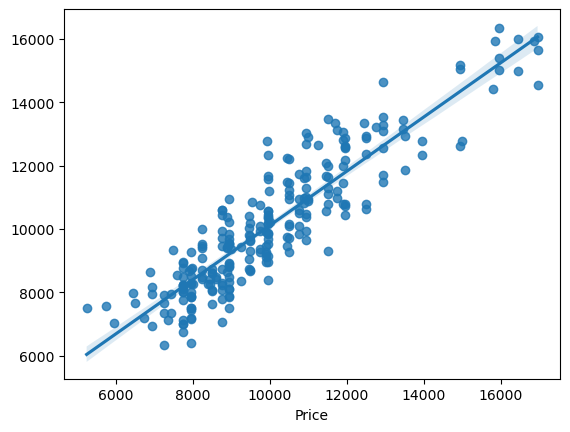

In [24]:
sns.regplot(x=y_test,y=y_pred)
plt.show()

In [25]:
y_pred=LR_Model_1.predict(X_train)

print('💠RESULTS ON TRAINING DATA💠')
print('▶ r2_score for LR_Model_1 ',r2_score(y_train,y_pred))
print('▶ mean_squared_error for LR_Model_1 ',mean_squared_error(y_train,y_pred))
print('▶ root_mean_squared_error for LR_Model_1 ',np.sqrt(mean_squared_error(y_train,y_pred)))

RESULTS OF TRAINING DATA
▶ r2_score for LR_Model_1  0.7798289566732215
▶ mean_squared_error for LR_Model_1  1143685.0422765044
▶ root_mean_squared_error for LR_Model_1  1069.4321120466248


## 💠Model-2 :Lasso (L1 regularization)

In [36]:
Model_L1=Lasso(alpha=0.6,max_iter=500,tol=0.01)
Model_L1.fit(X_train,y_train)

y_pred=Model_L1.predict(X_test)

print('▶ r2_score for Model_L1 ',r2_score(y_test,y_pred))
print('▶ mean_squared_error for Model_L1 ',mean_squared_error(y_test,y_pred))
print('▶ root_mean_squared_error for Model_L1 ',np.sqrt(mean_squared_error(y_test,y_pred)))

▶ r2_score for Model_L1  0.8199656057523153
▶ mean_squared_error for Model_L1  921583.8374121073
▶ root_mean_squared_error for Model_L1  959.9915819485644


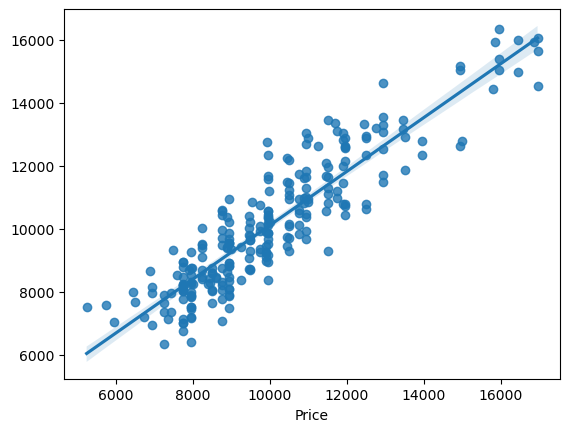

In [37]:
sns.regplot(x=y_test,y=y_pred)
plt.show()

In [38]:
y_pred=Model_L1.predict(X_train)

print('💠RESULTS ON TRAINING DATA💠')
print('▶ r2_score for Model_L1 ',r2_score(y_train,y_pred))
print('▶ mean_squared_error for Model_L1 ',mean_squared_error(y_train,y_pred))
print('▶ root_mean_squared_error for Model_L1 ',np.sqrt(mean_squared_error(y_train,y_pred)))

RESULTS ON TRAINING DATA
▶ r2_score for Model_L1  0.7798213654385131
▶ mean_squared_error for Model_L1  1143724.4751712994
▶ root_mean_squared_error for Model_L1  1069.4505482589175


## 💠Model-3 :Ridge(L2 regularization)

In [39]:
Model_L2=Ridge(alpha=0.6,max_iter=500,tol=0.01)
Model_L2.fit(X_train,y_train)

y_pred=Model_L2.predict(X_test)

print('▶ r2_score for Model_L2 ',r2_score(y_test,y_pred))
print('▶ mean_squared_error for Model_L2 ',mean_squared_error(y_test,y_pred))
print('▶ root_mean_squared_error for Model_L2 ',np.sqrt(mean_squared_error(y_test,y_pred)))

▶ r2_score for Model_L2  0.820843253556565
▶ mean_squared_error for Model_L2  917091.21790617
▶ root_mean_squared_error for Model_L2  957.6487967444903


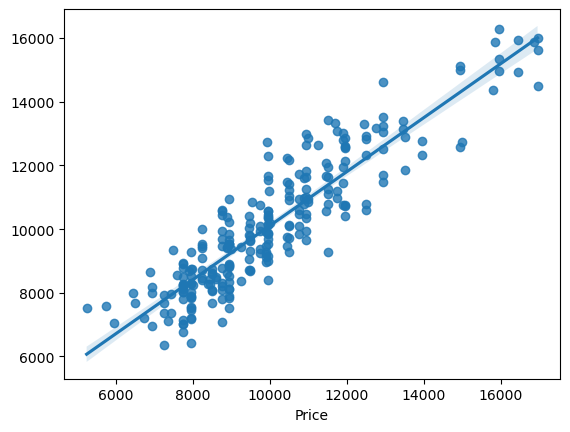

In [40]:
sns.regplot(x=y_test,y=y_pred)
plt.show()

In [41]:
y_pred=Model_L2.predict(X_train)

print('💠RESULTS ON TRAINING DATA💠')
print('▶ r2_score for Model_L2 ',r2_score(y_train,y_pred))
print('▶ mean_squared_error for Model_L2 ',mean_squared_error(y_train,y_pred))
print('▶ root_mean_squared_error for Model_L2 ',np.sqrt(mean_squared_error(y_train,y_pred)))

💠RESULTS ON TRAINING DATA💠
▶ r2_score for Model_L2  0.7797562797585703
▶ mean_squared_error for Model_L2  1144062.5646743157
▶ root_mean_squared_error for Model_L2  1069.6086034967725


## 💠Conclusion :

#### ▶ All the three models showes similar results on train and testing data and no signs of overfitting can be seen in results.
#### ▶ Majority of the vehicles are manual and with fuel_type as Petrol
#### ▶ There is not a such difference in average price of Manual and Automatic vehicle

## 💠Interview Questions:
#### ▶1.What is Normalization & Standardization and how is it helpful?
    Normalization is a technique use to scale down the data when the data distribution is not in Gaussian distribution,which scale the data in range of 0 to 1 OR -1 to 1 which ultimately reduces the bias and processing time specially in algorithms like ANN, Multi-Linear regression. 
    Standardization is used for feature scaling when it showes the Gaussian distribution.It is used to ensure the data to have zero mean and unit standard deviation.It is also used to maintain consistancy of data when data comes from different populations.

#### ▶2.What techniques can be used to address multicollinearity in multiple linear regression?
    For dealing with multicollinearity the general concept is used is VIF [Variance Inflating factor], it is considered that the VIF value greater than 5 for a variable represents 'High Multicollinearity exists'.